# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
train = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

In [3]:
# checking the columns of each datset
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
# checking the data types of the variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [7]:
# checking the shapes of each dataset
train.shape

(31647, 18)

In [8]:
test.shape

(13564, 17)

We can see that we have 17 similar features in the both the dataset and 'Subscribed' is the varriable that is to be predicted 

# Data Exploration

In [9]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [11]:
# checking the missing values in train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
# checking for missing values in test dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Univariate Analysis

# Analysis of "Subscribed" variable

In [13]:
# Frequency of 'Subscribed'
train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

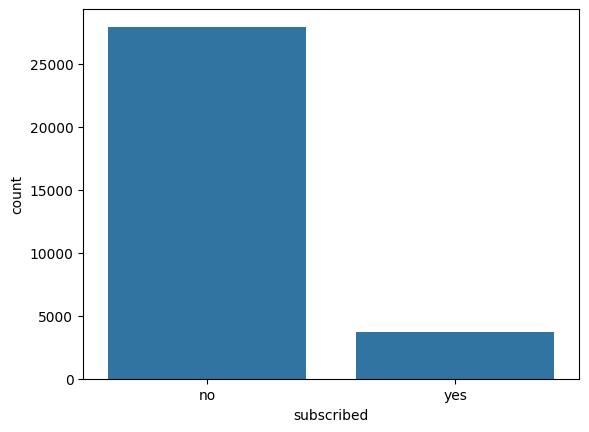

In [14]:
# plotting
sns.countplot(data=train, x='subscribed')

In [15]:
# Normalizing the frequency table of 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%.

# Analysing 'Job' variable

In [16]:
# Frequency table
train['job'].value_counts()

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

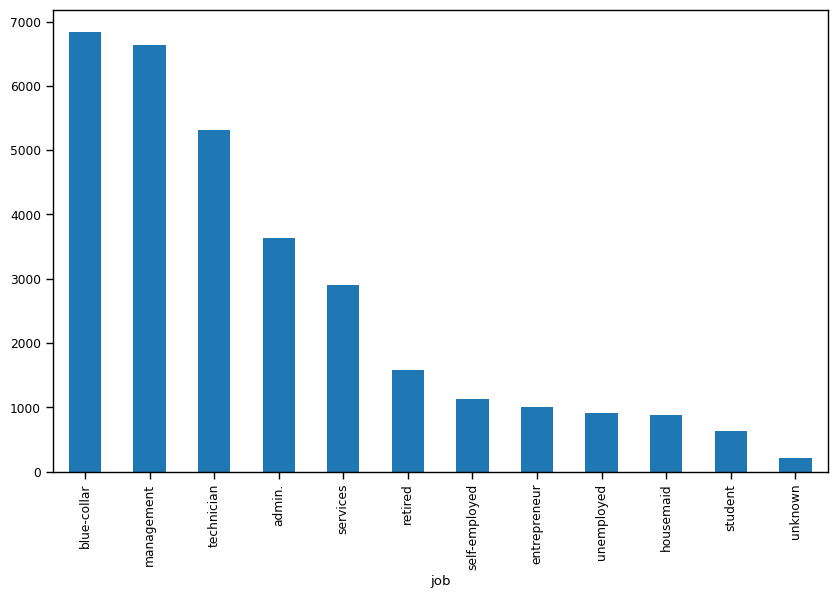

In [17]:
# plotting
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar',figsize =(10,6));

We cam see that most of the clients beloned to blue-coller job and students are least in general as they don't make term deposits in general.

# Analysis of 'marital' status

In [18]:
train['marital'].value_counts()

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

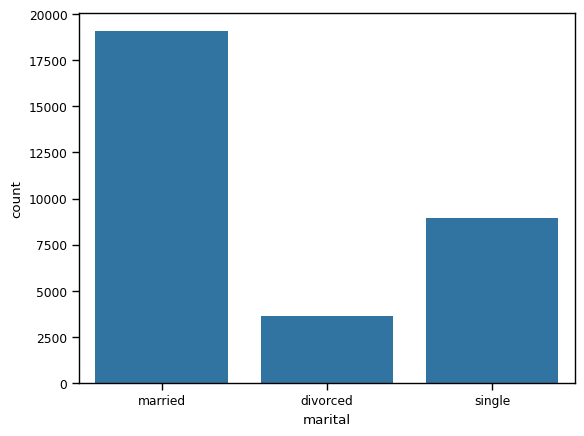

In [19]:
sns.countplot(data=train,x='marital');

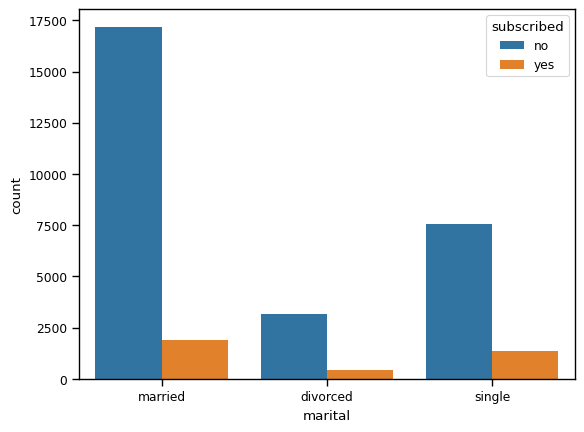

In [20]:
sns.countplot(data=train,x='marital', hue='subscribed');

# Analyzing the 'age' variable

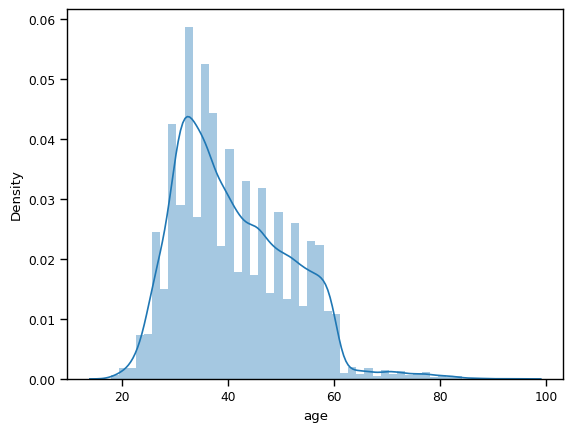

In [21]:
sns.distplot(train['age']);

We can infer that most of the clients fall in the age group between 20-60.

# Bivariate Analysis

In [22]:
# job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [23]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

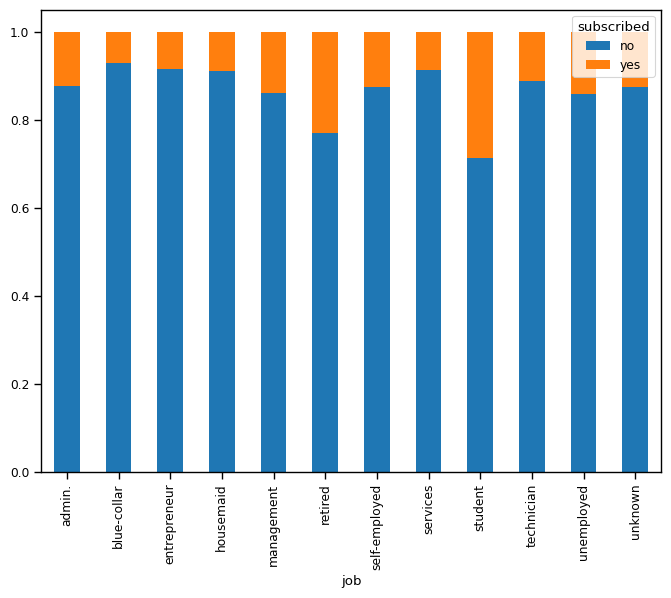

In [24]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances od subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reasion is that number od students in the dataset is less and comparatively to other job types, more student have subscribed to a term deposit. 

In [25]:
# Marital Status vs subscribed
pd.crosstab(train['marital'],train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [26]:
marital = pd.crosstab(train['marital'],train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float),axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


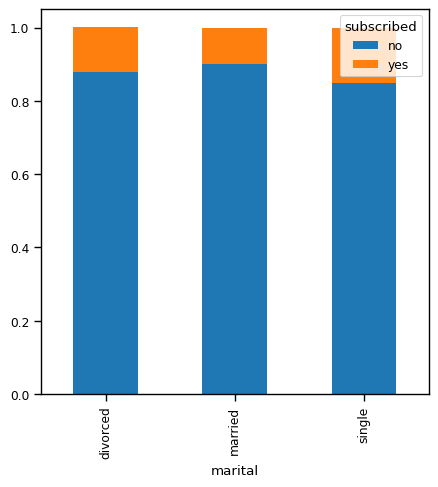

In [27]:
marital_norm.plot.bar(stacked=True, figsize=(5,5));

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits. 

In [28]:
# Default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [29]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

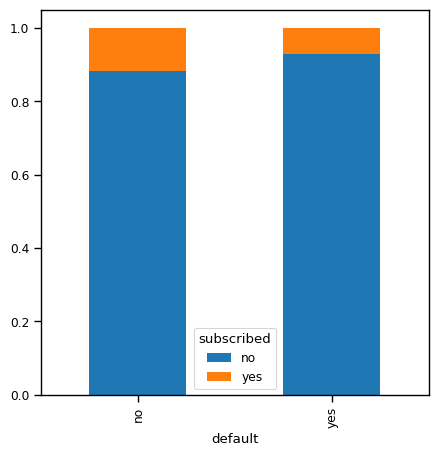

In [30]:
dflt_norm.plot.bar(stacked =True, figsize=(5,5))

We can infer that clients having no previous default have slightly higher chances of subscribing to term loan as compared to the
client who have previous default history.

In [31]:
# Converting the target variable into 0s and 1s
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

In [32]:
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [33]:
# correlation matrix
train1= train[['ID','age','balance','day','duration','campaign','pdays','previous','subscribed']]
tc = train1.corr()
tc

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

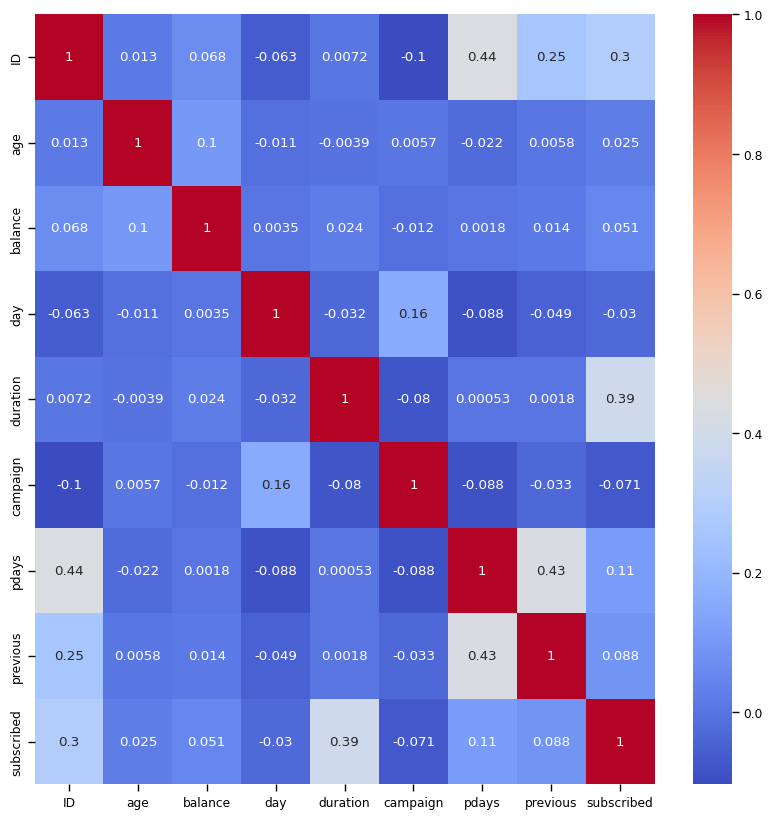

In [34]:
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(tc,annot=True, cmap='coolwarm')

We can infer that duration of call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

# Model Building

In [35]:
target = train['subscribed']
train = train.drop('subscribed',axis=1)

In [43]:
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,True,False,...,False,False,False,True,False,False,False,False,False,True
1,40576,31,3,20,91,2,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15320,27,891,18,240,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,43962,57,3287,22,867,1,84,3,False,False,...,True,False,False,False,False,False,False,False,True,False
4,29842,31,119,4,380,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True


True = 1
False= 0

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_val,y_train,y_val= train_test_split(train, target,test_size=0.2,random_state=12)

# logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lreg = LogisticRegression()

In [48]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [49]:
pred = lreg.predict(X_val)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_val, pred)

0.8868878357030016

We got an accuracy score of around 89%

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
clf = DecisionTreeClassifier(max_depth =4, random_state=0)
clf.fit(X_train,y_train)
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
accuracy_score(y_val,predict)

0.9042654028436019

 We got an accuracy of more than 90% on the validation set.
 Let's now make the prediction on test dataset

In [55]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
1,40403,78,2787,1,372,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3709,31,144,16,676,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,37422,57,3777,13,65,2,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
4,12527,45,-705,3,111,1,-1,0,False,True,...,False,False,False,False,False,False,False,False,False,True


True=1
False=0

In [56]:
test_pred = clf.predict(test)
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

Finally, we will save these prediction into a csv file.

In [57]:
submission = pd.DataFrame()
submission['ID']=test['ID']
submission['subscribed']=test_pred

In [58]:
submission['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

Since the target vaiable is yes or no we will convert 1 and 0 in the predictions to yes or no respectively.

In [59]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [60]:
submission['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [61]:
submission.to_csv('Subcription file.csv', header=True,index=False)